In [ ]:
# Run these separately to install the required libraries
#If needed any other install that like this
!pip install hdbscan
!pip install basemap
!pip install folium
!pip install numpy
!pip install pandas
!pip install nltk
!pip install matplotlib

In [28]:
'''

Textual metadata processing

This code appears to be performing textual metadata processing on a dataset. 

Importing necessary libraries: The code begins by importing various libraries such as csv, nltk, numpy, pandas, and defaultdict. These libraries are used for handling CSV files, natural language processing tasks, data manipulation, and dictionary operations.

Input and output file handling: The code specifies the input and output file paths for processing. It reads the input CSV file using pandas and saves it as a new CSV file with selected columns, renaming the headers in the process.

Text processing: The code performs several text processing operations on the data. It tokenizes the text into words using a regular expression tokenizer. It then removes stopwords (common words like "the," "is," etc.) from the tokenized words. After that, it lemmatizes the remaining words to reduce them to their root form. Next, it filters out only the nouns from the lemmatized words. Finally, it concatenates the selected words into a single string and stores it in the "Tags" column of the DataFrame.

Generating binary vectors: The code creates a binary vector (bv) to track which tags have been used for each photo. It initializes the binary vector with zeros and sets the corresponding positions to 1 for the tags that appear in the "Tags" column of the DataFrame.

Filtering tags: The code filters out tags that appear more than once, reducing the number of tags to consider.

Identifying interesting words: The code calculates the occurrence frequency of each remaining tag and identifies the tags that appear more frequently than a threshold (calculated based on the length of the DataFrame). These tags are considered "interesting."

Finding corresponding photo IDs: The code retrieves the photo IDs associated with the interesting tags by looking up the tags in the tagPid dictionary, which maps tags to lists of photo IDs.

Output generation: Finally, the code selects the rows from the DataFrame that correspond to the interesting photo IDs and saves them in a new CSV file.

Overall, this code aims to process textual metadata from the input dataset, filter out redundant tags, identify interesting tags based on their occurrence frequency, and retrieve the corresponding photo IDs associated with those tags.


'''


'\n\nTextual metadata processing\n\nThis code appears to be performing textual metadata processing on a dataset. \n\nImporting necessary libraries: The code begins by importing various libraries such as csv, nltk, numpy, pandas, and defaultdict. These libraries are used for handling CSV files, natural language processing tasks, data manipulation, and dictionary operations.\n\nInput and output file handling: The code specifies the input and output file paths for processing. It reads the input CSV file using pandas and saves it as a new CSV file with selected columns, renaming the headers in the process.\n\nText processing: The code performs several text processing operations on the data. It tokenizes the text into words using a regular expression tokenizer. It then removes stopwords (common words like "the," "is," etc.) from the tokenized words. After that, it lemmatizes the remaining words to reduce them to their root form. Next, it filters out only the nouns from the lemmatized words.

In [29]:
#Textual Metadata Processing

import csv
import nltk
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import os

# Specify directory and convert to CSV
import pandas as pd
location="Results/Input records/Filtered1M.csv"
data = pd.read_csv(location, header=None)
data.to_csv("Results/Input records/TP1M.csv",columns=[0,1,3,5,12,13,14],index=False,header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Change file name
location="Results/Input records/Filtered1M.csv"
dest = "Results/Input records/TP1M.csv"
data = pd.read_csv(location, header=None)
tokenizer = RegexpTokenizer(r'[a-zA-Z_]+')
data2 = pd.read_csv(dest)
data2['Tags'] = ""
Info=[]
tagPid=defaultdict(list)

In [30]:
from nltk.corpus import stopwords

#Selecting appropriate metadata
for i in range(0,len(data.index)):
    user_tag=str(data[10][i])
    user_tag+=str(data[8][i])
    user_tag+=str(data[9][i])
    filtered = []
    filtered = list(set(filtered + tokenizer.tokenize(user_tag)))


    # removing stop words
    stop_words = set(stopwords.words('english'))
    stop_removed =[]
    for w in filtered:
        if w not in stop_words:
            stop_removed.append(w)

    # reducing words to their root form
    stemmed=[]
    lemmatizer = WordNetLemmatizer()
    for w in stop_removed:
        stemmed.append(lemmatizer.lemmatize(w))

    # obtain only nouns
    nouns = []
    for w in stemmed:
        for word,pos in nltk.pos_tag([w]):
             if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                nouns.append(w)

    #Appending words in root form to file
    k=""
    final = list(set(nouns))
    for g in final:
        k+=g
        if g in tagPid.keys():
            tagPid[g].append(data[1][i])
        else:
            tagPid[g].append(data[1][i])
        k+=" "
    Info+=final
    
    data2["Tags"][i]=k
Info=list(set(Info))

C:\Users\HP\AppData\Local\Temp\ipykernel_17716\3674161021.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Tags"][i]=k


In [32]:
data2.to_csv("Results/Input records/Textproc1M.csv",index=False)
newfile= "Results/Input records/Textproc1M.csv"
newframe = pd.read_csv(newfile)

#Binary vector to find which all tags have been used
bv = np.zeros(shape=(len(data.index),len(Info)))
int_tags={}
for w in Info:
    int_tags[w]=0
tags=newframe.Tags
for s in tags:
    i=0
    l=s.split(" ")
    count=0
    for w in Info:
        if w in l:
            count+=1
            bv[i][Info.index(w)]=1
            
            int_tags[w]+=1
            i+=1
            
#Filtering tags which appear more than 1 time
i=0
count=0
for i in int_tags.keys():
    if int_tags[i] > 1:
        count+=1
#Finding the interesting words based on threshold
interested={}
threshold = 1/len(newframe)
for w in Info:

    if int_tags[w]/len(newframe) > threshold:
        interested[w] = int_tags[w]/len(Info)
#Finding photo ID corresponding to interesting words
photo_id=[]
for w in interested.keys():
    photo_id=list(set(photo_id+tagPid[w]))
df=newframe.query('PhotoID in @photo_id')  
output_path="Results/TextualMetadataProcessing"
df.to_csv(output_path/TP_op1M.csv,columns=['PhotoID','UserID','Latitude','Longitude','Accuracy'],index=False,header=['PhotoID','UserID','Latitude','Longitude','Accuracy'])
print('Tp_op1M csv file is created in TextualMetadataProcessing folder for further processing')

Tp_op1M csv file is created in TextualMetadataProcessing folder for further processing


In [ ]:

'''
Geographiucal clustering
This code appears to perform clustering and visualization of geographical data using HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) algorithm. Here's a breakdown of the code and its purpose:

Importing necessary libraries: The code imports various libraries including math, numpy, pandas, matplotlib, sklearn.datasets, hdbscan, folium, mpl_toolkits.basemap, matplotlib.cm, and matplotlib.colors. These libraries are used for mathematical calculations, data manipulation, clustering, and visualization.

Loading CSV file: The code reads the CSV file generated from the previous textual metadata processing step. The latitude and longitude values are extracted from the DataFrame.

Clustering step: The code performs clustering using HDBSCAN algorithm on the latitude and longitude coordinates. It assigns cluster labels to each point and determines the number of clusters. It also creates a dictionary cluster_points that maps each cluster label to the corresponding points in that cluster.

Plotting points on a map: The code uses the Basemap library to create a map projection and plots the latitude and longitude coordinates on the map using Mercator projection. The points are represented by scatter markers. It also adds an ArcGIS image as a background to the map.

Defining a color map: The code defines a function get_cmap that maps each cluster label to a distinct RGB color. This function is used to assign different colors to different clusters when plotting.

Plotting clusters on a map: The code uses the Basemap library again to create a map projection. It iterates over each cluster, selects the latitude and longitude coordinates for that cluster, and plots them on the map using different colors based on the cluster label. It also adds an ArcGIS image as a background to the map.

Finding cluster representatives: The code creates dictionaries cluster_exemplar and cluster_exemplar_photoid to store the cluster exemplars (representative points) and their corresponding photo IDs. It extracts the exemplar coordinates from the HDBSCAN algorithm's exemplars_ attribute and converts them from radians to degrees. The exemplars are then stored in the dictionaries based on their cluster labels.

Overall, this code performs clustering on geographical data and visualizes the clusters on a map. It also identifies cluster representatives (exemplars) and stores their information for further analysis.





The code generates two graphs to visualize the clusters on a map. Here's an explanation of the formation of each graph:

Plotting points on a map:

The first graph is created using the m.scatter() function from the Basemap library.
The latitude and longitude coordinates of the points are obtained from the DataFrame.
The m.scatter() function is called with the latitude and longitude coordinates (x and y), marker size (5), marker shape ('o' for circles), and marker color ('b' for blue).
The map projection is created using the Basemap library with the projection='merc' parameter, which specifies a Mercator projection.
The m.arcgisimage() function is called to add an ArcGIS image as the background to the map.
Finally, plt.show() is called to display the graph.
Plotting clusters on a map:

The second graph is created using a similar approach as the first graph, but it iterates over each cluster and plots the points in different colors based on the cluster label.
The unique_label variable stores the unique cluster labels.
The get_cmap() function is used to generate a color map based on the number of clusters (num_clusters).
The enumerate() function is used to iterate over the clusters and their corresponding colors.
Within the loop, the latitude and longitude coordinates for each cluster are obtained.
The m.scatter() function is called with the cluster's latitude and longitude coordinates (x and y), marker size (5), marker shape ('o' for circles), marker color (cmaps(i) for cluster-specific color), and zorder=10 to ensure the clusters are plotted on top of the map.
The map projection and ArcGIS image are added to the graph similar to the first graph.
Finally, plt.show() is called to display the graph.
These two graphs provide visual representations of the clusters and their distribution on a map. The points represent the latitude and longitude coordinates of the data, and each cluster is displayed with a distinct color, allowing for easy identification and analysis of spatial patterns in the data.




Geographical clustering can be used to analyze tourist behavior because it allows for the identification and understanding of spatial patterns in tourist activities. Here are a few reasons why geographical clustering is valuable for analyzing tourist behavior:

Identification of hotspots: Geographical clustering helps identify areas or regions that attract a high concentration of tourists, known as hotspots. These hotspots can represent popular tourist destinations, landmarks, attractions, or areas with specific characteristics that appeal to tourists. By clustering and visualizing the distribution of tourists on a map, we can identify these hotspots and gain insights into where tourists tend to concentrate.

Understanding travel patterns: Geographical clustering helps uncover travel patterns and routes followed by tourists. By clustering tourist locations or movements, we can identify common paths, popular itineraries, or sequences of destinations visited by tourists. This information can provide insights into how tourists move between different places, helping to understand their travel patterns and preferences.

Segmenting tourist groups: Geographical clustering can be used to segment tourists into different groups based on their spatial behaviors. By clustering tourists based on their visitation patterns, interests, or preferences, we can identify distinct tourist segments with specific characteristics. This segmentation can help in tailoring marketing strategies, designing targeted experiences, or developing tourism products that cater to the needs and preferences of different tourist segments.

Spatial analysis of tourist activities: Geographical clustering enables the analysis of various aspects of tourist activities in specific locations. By clustering tourist data, such as accommodation choices, attraction visits, or spending patterns, we can examine the spatial distribution and relationships between different activities. This analysis can provide insights into the geographic factors that influence tourist behavior, such as proximity to attractions, accessibility, or spatial interactions between different tourism-related entities.

Planning and resource allocation: Geographical clustering can inform tourism planning and resource allocation decisions. By understanding the spatial distribution of tourist activities and preferences, destination managers can make informed decisions about infrastructure development, transportation networks, accommodation facilities, and the allocation of resources to enhance the overall tourist experience. Clustering can help identify areas that require infrastructure improvements, capacity management, or targeted investments to better serve tourists.

In summary, geographical clustering provides valuable insights into tourist behavior by identifying hotspots, understanding travel patterns, segmenting tourists, analyzing spatial behaviors, and supporting planning and resource allocation decisions. These insights can inform tourism management strategies, destination marketing efforts, and the development of tourist experiences that align with the preferences and needs of different tourist segments.


'''

C:\Users\HP\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


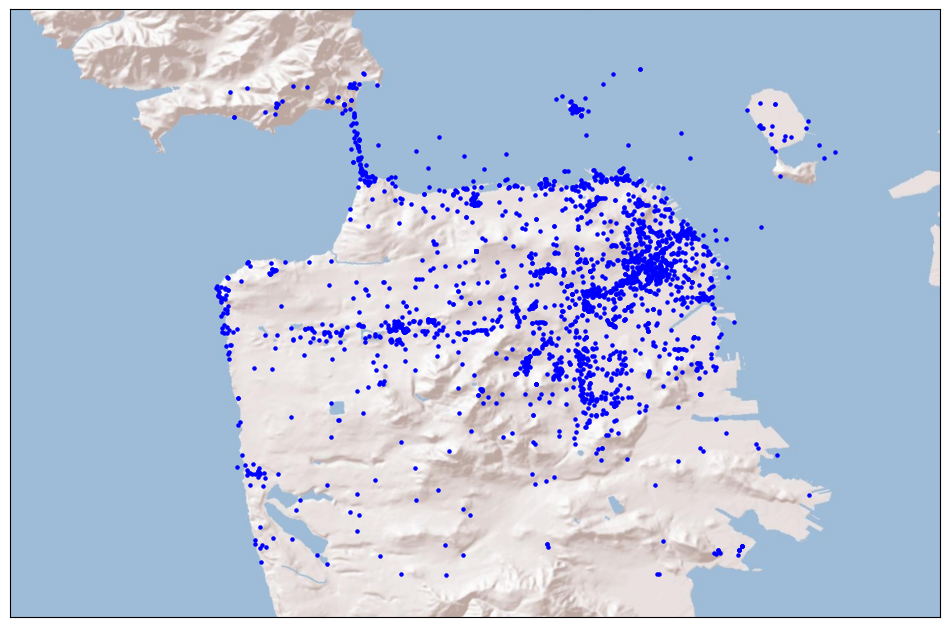

C:\Users\HP\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


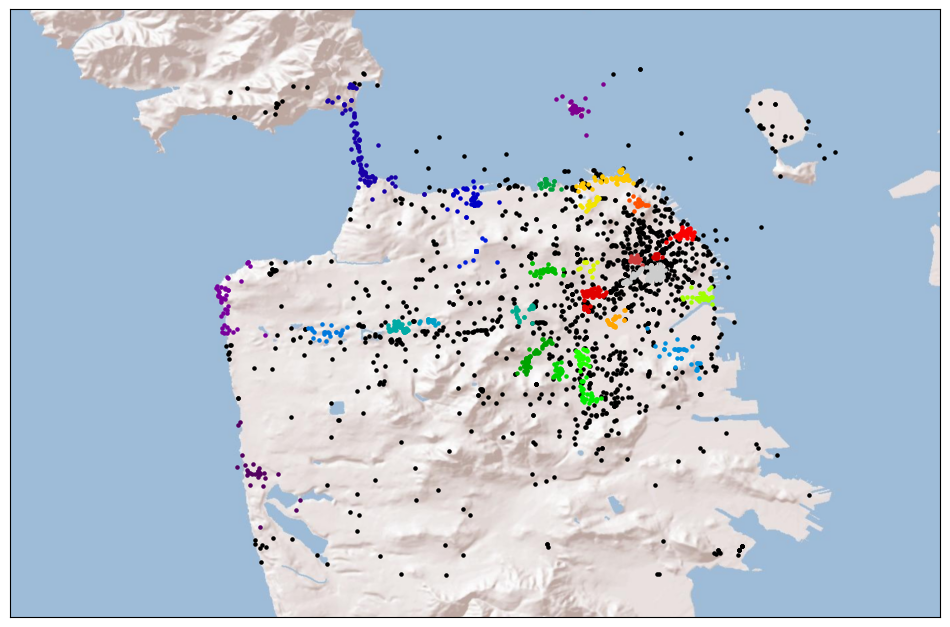

In [25]:
# Geographical Data Clustering
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

# Loading CSV File (Output of Text processing step)
input_file = "Results/TextualMetadataProcessing/TP_op1M.csv"
df = pd.read_csv(input_file)
df1 = df.copy()
coord = {}
Lat = np.asarray(df['Latitude'])
Long = np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values
rads = np.radians(coords)

# Clustering step
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, metric='haversine', gen_min_span_tree=True, min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label = clusterer.labels_
x = cluster_label
cluster_points = {}
for i in range(num_clusters + 1):
    cluster_points[i] = []
    
cluster_points[-1]=[]

for i in range(0,len(x)):
    l = cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]] = l

plt.figure(figsize=(12, 12))

# Plotting points on map
m = Basemap(projection='merc', resolution='l', epsg=4269, llcrnrlon=-122.567288, llcrnrlat=37.696627, urcrnrlon=-122.329308, urcrnrlat=37.852144)
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x, y, 5, marker='o', color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral')
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize=(12, 12))

m = Basemap(projection='merc', resolution='l', epsg=4269, llcrnrlon=-122.567288, llcrnrlat=37.696627, urcrnrlon=-122.329308, urcrnrlat=37.852144)

unique_label = np.unique(cluster_labels)
cmaps = get_cmap(num_clusters)

for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x, y, 5, marker='o', color=cmaps(i), zorder=10)

m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.show()

# Finding Cluster representatives


In [ ]:
'''
Trend Estimation
This code appears to be related to trend estimation and regression modeling using the Scikit-learn library in Python. Here's an explanation of the purpose and functionality of the code:

Importing libraries: The code imports several necessary libraries, including pandas, numpy, operator, matplotlib.pyplot, Ridge and Lasso regression models from Scikit-learn, PolynomialFeatures, and make_pipeline from Scikit-learn's preprocessing and pipeline modules.

Setting up the environment: %matplotlib inline is a Jupyter Notebook magic command that enables the inline display of matplotlib plots.

Linear regression and Lasso regression models: The code initializes instances of linear regression (regr) and Lasso regression (clf) models using the respective classes from Scikit-learn. The Lasso regression model uses a regularization parameter (alpha) of 0.1.

Loading and processing data: The code loads a CSV file ("fullaustralia.csv") corresponding to a particular region using pandas. The file is assumed to have no header, as the header=None argument is passed to pd.read_csv(). The code converts the fifth column of the DataFrame (df[5]) to datetime format using pd.to_datetime().

Generating feature matrix and target values: The code generates a feature matrix (X_my) and a target values list (ct) based on the year and month of the data. It iterates over a range of years (2004 to 2013) and a range of months (1 to 12). For each combination of year and month, it appends the month and year values as a list to X_my and counts the number of records in the DataFrame that match that year and month, storing the count in ct.

Preparing test data: The code performs a similar process to generate a feature matrix (X_my_test) and a target values list (ct_test) for the test data, which is assumed to correspond to the year 2014.

Converting feature matrix to NumPy array: The code converts the feature matrix X_my to a NumPy array using np.asarray().

The purpose of this code appears to be to load and process data, generate feature matrices and target values for regression modeling, and prepare the data for further analysis. The specific use case and subsequent code for trend estimation or regression modeling are not included in the provided code snippet


In the provided code, there are two plots on each graph: one for the predicted values (Y_pred) and one for the actual number of tourists (Ct).

The different colors on the graph represent the different lines or data points corresponding to the two plots. Typically, the predicted values (Y_pred) are plotted as a line, while the actual number of tourists (Ct) is plotted as points.

In the code, the line representing the predicted values (Y_pred) is plotted in one color, and the points representing the actual number of tourists (Ct) are plotted in another color. The specific colors used for the lines and points may vary depending on the default color scheme of the plotting library or any customization applied.

By using different colors for the two plots, it becomes easin er to visually distinguish between the predicted values and the actual values, facilitating the comparison and assessment of the regression models' performance.


In the provided code snippet, the red line represents the predictions made by the regression model using the specific regression approach being applied (linear, polynomial, Ridge, or Lasso). The other lines in different colors represent the actual data points plotted against the corresponding input values.

The purpose of plotting both the red line and the other color lines is to compare the model's predictions with the actual data. By visually assessing the alignment between the predicted values (red line) and the actual data points (other color lines), you can evaluate how well the model fits the observed data and determine the accuracy of the regression approach used.
'''

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.82554e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.87252e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+03, tolerance: 1.841e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check

5.570096763663404

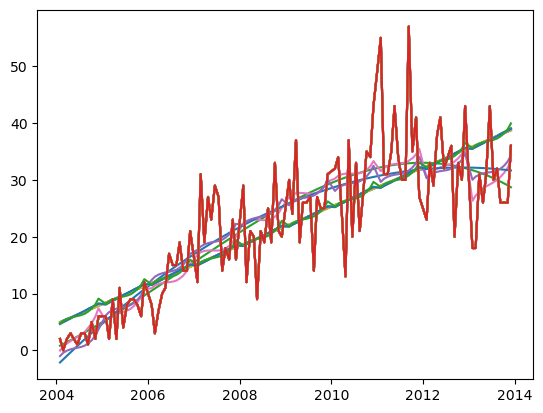

In [26]:
# Trend Analysis


import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
from sklearn import linear_model as lm

regr = lm.LinearRegression()
clf = Lasso(alpha=0.1)

# Loading CSV corresponding to a particular region
df = pd.read_csv("Results/TrendEstimation/fullaustralia.csv", header=None)
df2 = pd.to_datetime(df[5])
months = list(range(1, 13))
years = list(range(2004, 2014))
df[5] = pd.to_datetime(df[5])
ct = []

X_my = []
for year in years:
    for month in months:
        l = [month, year]
        X_my.append(l)
        ct.append(len(df.loc[operator.and_(df[5].dt.year == year, df[5].dt.month == month)]))

df[5] = pd.to_datetime(df[5])
ct_test = []
X_my_test = []
year = 2014
for month in months:
    l = [month, year]
    X_my_test.append(l)
    ct_test.append(len(df.loc[operator.and_(df[5].dt.year == year, df[5].dt.month == month)]))

X_my = np.asarray(X_my)
Ct = np.asarray(ct).reshape(-1, 1)
X_my_test = np.asarray(X_my_test)
Ct_test = np.asarray(ct_test).reshape(-1, 1)

# NORMALIZING MONTH-YEAR VALUE
nry = []
for i in X_my:
    g = i[0]
    k = i[1]
    norm = k + (round((g / 13), 2))
    nry.append(norm)

nry_test = []
for i in X_my_test:
    g = i[0]
    k = i[1]
    norm = k + (round((g / 13), 2))
    nry_test.append(norm)

# Linear - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), regr)

# nry vs no of tourists
# Trying out various combinations

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), regr)
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(1), regr)

# X_my vs No of tourists

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), regr)
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# Ridge - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), Ridge())

# nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(1), Ridge())

# X_my vs No of tourists
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), Ridge())
poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# Lasso - deg 1 and 2
poly = make_pipeline(PolynomialFeatures(1), clf)

# nry vs no of tourists

poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

poly = make_pipeline(PolynomialFeatures(3), clf)
poly.fit(np.asarray(nry).reshape(-1, 1), Ct)
Y_pred = poly.predict(np.asarray(nry).reshape(-1, 1))
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)

# X_my vs No of tourists

poly = make_pipeline(PolynomialFeatures(1), clf)

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred.reshape(-1, 1))
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)
poly = make_pipeline(PolynomialFeatures(3), clf)

poly.fit(X_my, Ct)
Y_pred = poly.predict(X_my)
plt.plot(np.asarray(nry), Y_pred)
plt.plot(np.asarray(nry), Ct)
mean_absolute_error(Ct, Y_pred)


In [ ]:
'''

Time Series

This code appears to perform time series analysis and visualization using the pandas and matplotlib libraries in Python. Here's an explanation of the purpose and functionality of the code:

Importing libraries: The code imports necessary libraries, including pandas, numpy, operator, matplotlib.pyplot, Ridge regression model from Scikit-learn, PolynomialFeatures, and make_pipeline from Scikit-learn's preprocessing and pipeline modules, and mean_absolute_error, mean_squared_error from Scikit-learn's metrics module. It also includes some additional imports, such as calendar and sklearn.

Setting up the environment: %matplotlib inline is a Jupyter Notebook magic command that enables the inline display of matplotlib plots.

Loading and processing data: The code loads a CSV file ("Filtered1M.csv") corresponding to a particular region using pandas. The file is assumed to have no header, as the header=None argument is passed to pd.read_csv(). The code converts the fifth column of the DataFrame (df[5]) to datetime format using pd.to_datetime().

Finding data for each month: The code calculates the count of records in the DataFrame for each month. It iterates over a range of months (1 to 12), and for each month, it counts the number of records that match that month using df[5].dt.month == i condition. The counts are stored in the ct list. The counts are then normalized by dividing them by 10.

Plotting time series data: The code converts the months and ct lists to NumPy arrays using np.asarray(). It then plots the time series data using plt.scatter() to display the data points and plt.plot() to draw a line connecting the data points. The color='blue' and linewidth=1 parameters are used to specify the color and linewidth of the line plot.

Creating a dictionary of all months: The code initializes an empty dictionary allmonths and iterates over the months (1 to 12). For each month, an empty list is added to the dictionary allmonths. This step sets up the dictionary to store data for each month.

Further iterations for year and month: The code continues iterating over the years (2004 to 2013) and months (1 to 12). We have taken one month for reference.

The purpose of this code appears to be to load and process time series data, calculate and plot the counts for each month, and set up a data structure (dictionary) to store data for each month.

Scatter plot of Monthly Visitors: The first graph is a scatter plot that shows the number of visitors per month. The x-axis represents the months (1-12), and the y-axis represents the count of visitors. Each data point on the graph represents the count of visitors for a specific month. The blue line on the graph represents the trend line that connects the data points.

Seasonal Component Plot: The second graph represents the seasonal component of the time series data. It shows the average difference between the actual count of visitors and the predicted count for each month. The x-axis represents the months (1-12), and the y-axis represents the average count of tourists. The blue line on the graph represents the average difference for each month. Additionally, the scatter points on the graph represent the mean absolute error (MAE) values for each month.
'''

C:\Users\HP\AppData\Local\Temp\ipykernel_17716\807235880.py:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2 = pd.to_datetime(df[5])
C:\Users\HP\AppData\Local\Temp\ipykernel_17716\807235880.py:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[5] = pd.to_datetime(df[5])


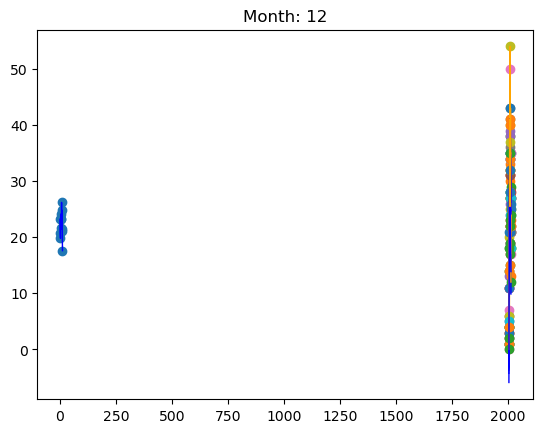

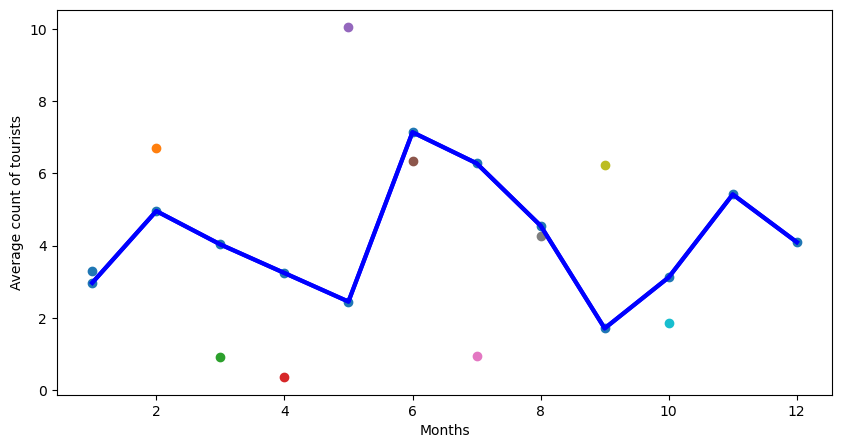

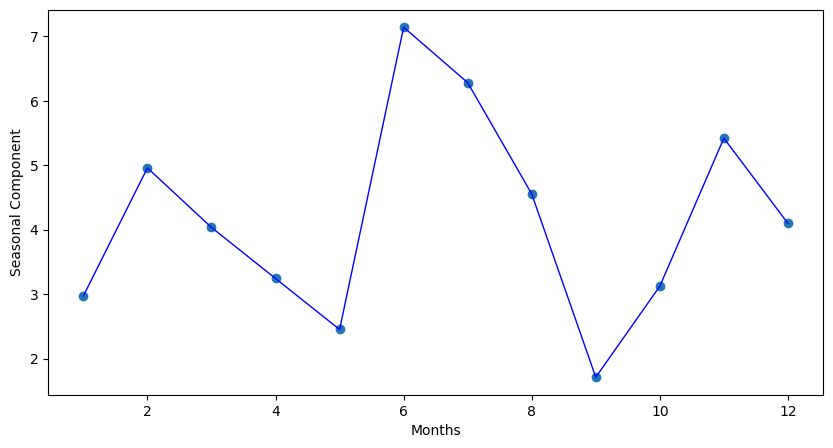

In [27]:
#Time series
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
import calendar
import sklearn
import sklearn.linear_model as lm

# Opening CSV File corresponding to a particular region
location = "Results/Input records/Filtered1M.csv"
df = pd.read_csv(location, header=None)
df2 = pd.to_datetime(df[5])
months = list(range(1, 13))
df[5] = pd.to_datetime(df[5])
ct = []

# Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i)]))
for i in range(len(ct)):
    ct[i] = ct[i] / 10

months = np.asarray(months)
count = np.asarray(ct)
plt.scatter(months, count)
plt.plot(months, count, color='blue', linewidth=1)
months = list(range(1, 13))
year = list(range(2004, 2014))
allmonths = {}

for i in months:
    allmonths[i] = []
for i in year:
    for j in months:
        allmonths[j].append(len(df.loc[operator.and_(df[5].dt.year == i, df[5].dt.month == j)]))

# Checking value for April
regr = lm.LinearRegression()
sc = []

# Plotting data for each month to find Trend for that particular month

for month in months:
    monthCt = np.asarray(allmonths[month])
    yr = np.asarray(year)

    plt.scatter(year, monthCt)

    poly = make_pipeline(PolynomialFeatures(3), regr)

    poly.fit(yr.reshape(-1, 1), monthCt)

    Y_pred = poly.predict(yr.reshape(-1, 1).reshape(-1, 1))

    plt.plot(year, monthCt, color="orange", linewidth=1)
    plt.plot(year, Y_pred.reshape(-1, 1), color='blue', linewidth=1)

    month_diff = []
    for i in range(len(monthCt)):
        month_diff.append(abs(monthCt[i] - Y_pred[i]))

    sc.append(mean_absolute_error(monthCt, Y_pred))

    plt.title("Month: {}".format(month))
    mean_absolute_error(monthCt, Y_pred)

# Plot of Months with average no. of visitors
fig, ax = plt.subplots(figsize=(10, 5))
month_average_diff = [np.mean(diff) if isinstance(diff, list) else diff for diff in month_diff]

for month in range(1, 13):
    if month <= len(month_diff) and isinstance(month_diff[month-1], list):
        ax.scatter(month, np.asarray(month_diff[month-1]))
    elif month <= len(month_diff):
        ax.scatter(month, month_diff[month-1])
    
ax.scatter(months, np.asarray(sc))
ax.plot(months, np.asarray(sc), color='blue', linewidth=3)

ax.set_xlabel("Months")
ax.set_ylabel("Average count of tourists")

ax.plot(months, np.asarray(sc), color='blue', linewidth=3)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(months, np.asarray(sc))
ax.set_xlabel("Months")
ax.set_ylabel("Seasonal Component")
ax.plot(months, np.asarray(sc), color='blue', linewidth=1)
